# Exercise 4: Parallel merge sort

In [2]:
# Non-parallel merge sort (implementation provided)
def merge_sort(data):
  if len(data) <= 1:
    return data
  else:
    split = len(data) // 2
    left = iter(merge_sort(data[:split]))
    right = iter(merge_sort(data[split:]))
    result = []
    # note: this takes the top items off the left and right piles
    left_top = next(left)
    right_top = next(right)
    while True:
      if left_top < right_top:
        result.append(left_top)
        try:
          left_top = next(left)
        except StopIteration:
          # nothing remains on the left; add the right + return
          return result + [right_top] + list(right)
      else:
        result.append(right_top)
        try:
          right_top = next(right)
        except StopIteration:
          # nothing remains on the right; add the left + return
          return result + [left_top] + list(left)

In [3]:
# Measure time complexity of merge_sort()
import numpy as np
import time

# Generate sample sizes n
n_values = np.logspace(1, 7, num = 5, base = 10).astype(int)

# Store performance time results
times = []

for n in n_values:
    # Generate random data
    data = np.random.rand(n)

    # Start timer
    start = time.perf_counter()

    # Sort the data
    sorted_data = merge_sort(data)

    # Stop timer
    end = time.perf_counter()

    # Calculate elapsed time
    elapsed = end - start

    # Store performance time
    times.append(elapsed)

Text(0.5, 1.0, 'Log-Log plot of merge_sort() time complexity')

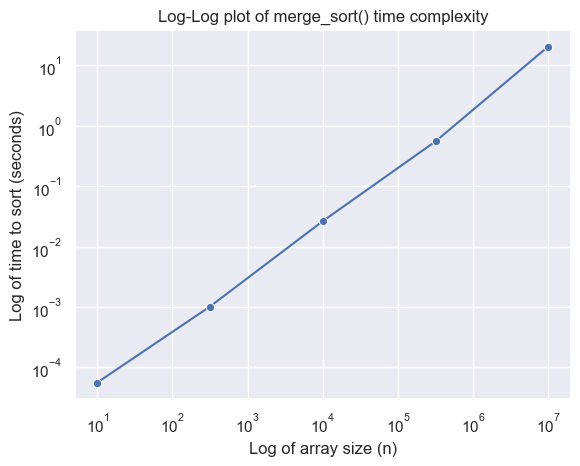

In [4]:
# Plot time complexity of merge_sort()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.DataFrame({
    'Array Size': n_values,
    'Time': times
})

sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='Array Size', y='Time', data=df, marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(array size) (n)')
ax.set_ylabel('log(time to sort) (seconds)')
plt.title('log-log plot of merge_sort() time complexity')

**Interpretation:** This plot appears to show a big-O scaling of $O (n log n)$ for `merge_sort()`. This is apparent because of the linear-looking shape of the line on log-log axis scaling.

In [ ]:
# Two-process parallel merge sort
import multiprocessing

def parallel_merge_sort(data):
    pass

In [ ]:
# Comparison of performance

**Discussion of findings:** 